### 【 251127_과제 】


In [97]:
## 모듈로딩
import pandas as pd              ## 데이터 분석용
import numpy as np               ## 로우 데이터 저장 및 수치 계산용
from statsmodels import robust  ## 통계 관련 모듈용
import matplotlib.pyplot as plt  ## 시각화 모듈
import koreanize_matplotlib      ## 한글 폰트 설정 모듈

In [72]:
## ===============================================================
## [문제 1] 개념 비교
## ===============================================================
## 일반 평균, 절사 평균, 가중 평균의 공통점과 차이점을 간단히 서술하세요.
print("공통점 : 데이터의 평균을 구함.\n차이점 : 일반 평균 - 모든 데이터 활용\n절사 평균 - 극단값 제거 후 평균\n가중 평균 - 각 데이터에 가중치 부여 후 평균\n")v

## 다음 상황에서 어떤 평균을 쓰는 것이 적절한지 고르고 이유를 쓰세요.

## (1) 극단값이 포함된 연봉 데이터의 대표값
print("(1)단값이 포함된 연봉 데이터의 대표값: 절사평균\n")

## (2) 각기 다른 표본 수를 가진 실험 그룹들의 평균 반응값 통합
print("(2)각기 다른 표본 수를 가진 실험 그룹들의 평균 반응값 통합: 가중평균\n")

## (3) 시험 점수 중 최근 시험에 더 높은 비중을 주고 싶을 때
print("(3)시험 점수 중 최근 시험에 더 높은 비중을 주고 싶을 때: 가중평균")

SyntaxError: invalid syntax (2547433683.py, line 5)

In [ ]:
## ===============================================================
## [문제 2] 반별 평균을 통합할 때 – 가중평균
## ===============================================================
## A반과 B반의 시험 결과가 다음과 같다.
##
## A반: 학생 수 10명, 평균 90점
##
## B반: 학생 수 40명, 평균 70점

## 전체 50명에 대한 단순 평균을 잘못 계산한 경우 (반 평균의 평균)과
##
## 올바른 전체 평균(가중평균) 을 계산하세요.
print(f"단순 평균을 잘못 계산한 경우 : {np.mean([90, 70])}점")
print(f"올바른 전체 평균(가중평균)   : {(90*(10/50)) + (70*(40/50))}점")


단순 평균을 잘못 계산한 경우 : 80.0점
올바른 전체 평균(가중평균)   : 74.0점


In [ ]:
## ===============================================================
## [문제 3] 절사 평균 계산
## ===============================================================
## 데이터는 아래와 같습니다. 
x=[10,12,11,9,13,200]

## 일반 평균을 구하시오.
print(f"일반평균 : {np.mean(x)}")

## 가장 작은 값과 가장 큰 값(10, 200)을 하나씩 제거한 후 절사 평균을 구하시오.
print(f"절사평균 : {np.mean(x[1:-1])}")

## 왜 절사 평균이 일반 평균보다 극단값에 덜 민감한지 설명하시오.
print("극단값을 제거하기 때문.")

일반평균 : 42.5
절사평균 : 11.25
극단값을 제거하기 때문.


In [ ]:
## ===============================================================
## [문제 4] 가중 평균 계산
## ===============================================================
## 어떤 회사의 고객 만족도 조사는 다음과 같습니다. 
##  그룹	응답자 수	평균 점수
##  VIP	       20	    4.8
##  일반	  200	    4.2
##
## 전체 고객의 가중 평균 만족도 점수를 계산하시오.
print(f"가중 평균 만족도 점수: { round((4.8*(20/220)) + (4.2*(200/220)), 2) }")
## 단순히 (4.8 + 4.2) / 2 로 계산하는 것이 왜 잘못되었는지 설명하시오.
print("각 그룹의 응답자 수가 다르기 때문.")

가중 평균 만족도 점수: 4.25
각 그룹의 응답자 수가 다르기 때문.


In [ ]:
## ===============================================================
##  [문제 5] Pandas로 그룹별 가중평균 계산 
## ===============================================================
## 다음과 같은 DataFrame이 있습니다.

df = pd.DataFrame({
    "group":  ["A", "A", "A", "B", "B"],
    "score":  [80, 90, 70, 60, 100],
    "weight": [1, 2, 1, 3, 1]
    })


## group별 단순 평균(score의 평균)을 구하시오.
print(f"group별 단순 평균: { df.score.mean() }")

## group별 가중평균(weight를 가중치로 사용)을 구하는 Pandas 코드를 작성하시오.
print(df.groupby('group').apply(lambda x: np.average(x.score, weights=x.weight)))


group별 단순 평균: 80.0
group
A    82.5
B    70.0
dtype: float64


C:\Users\005x3\AppData\Local\Temp\ipykernel_16020\1305982496.py:17: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  print(df.groupby('group').apply(lambda x: np.average(x.score, weights=x.weight)))


In [ ]:
## ===============================================================
##  [ 문제 6 ] 분산과 표준편차 비교
## ===============================================================
## 다음은 어느 반 학생 10명의 수학 시험 점수이다.
## A반: [70, 72, 75, 75, 76, 80, 82, 85, 88, 90]
## B반: [40, 55, 60, 70, 75, 90, 95, 98, 100, 100]
A = [70, 72, 75, 75, 76, 80, 82, 85, 88, 90]
B = [40, 55, 60, 70, 75, 90, 95, 98, 100, 100]

## 두 반의 분산(sample variance)을 각각 구하시오.
print(f"A반 분산: {np.var(A)}")
print(f"B반 분산: {np.var(B)}")
## 두 반의 표준편차를 비교하고, 어느 반의 점수 분포가 더 불안정한지 설명하시오.
print(f"A반 표준편차: {np.std(A)}")
print(f"B반 표준편차: {np.std(B)}")
print("B반의 점수 분포가 더 불안정함. 분산과 표준편차가 A반 보다 크기 때문.")


A반 분산: 41.81
B반 분산: 417.01000000000005
A반 표준편차: 6.466065264130885
B반 표준편차: 20.420822706247662
B반의 점수 분포가 더 불안정함. 분산과 표준편차가 A반 보다 크기 때문.


In [78]:
## ===============================================================
##  [ 문제 7] 중위절대편차(Median Absolute Deviation, MAD) 계산
## ===============================================================
## 다음은 특정 제조 공정에서 측정한 부품 길이(mm) 데이터입니다..

length = [99.8, 100.1, 100.0, 100.2, 99.9, 100.3, 100.5, 94.0]

## 위 데이터의 중앙값(median)을 구하시오.
print(f"중앙값(median) : {np.median(length)}\n")

## 각 데이터에서 중앙값을 뺀 절대값을 구하시오.
abs_values = []
for x in length:   
    abs_values.append(float(abs(x - np.median(length))))
print(f"각 데이터에서 중앙값을 뺀 절대값: {abs_values}\n")

## 그 절대값 리스트의 중앙값(MAD)을 구하시오.
print(f"중앙값(MAD): {np.median(abs_values)}\n")

## 이 데이터에서 MAD가 낮은지 높은지 해석하시오.
print("낮음. 중앙값이 데이터의 가장 높은 값보다 가장 낮은값에 더 가깝기 때문\n")

## 마지막 데이터 94.0을 제거했을 때 MAD는 어떻게 변하는가? 그 이유는?
length.remove(94.0)
remove_values = []
for x in length:   
    remove_values.append(float(abs(x - np.median(length))))
print(f"중앙값(MAD): {np.median(remove_values)}")
print("중앙값이 낮아짐. 극단값을 제거했기 때문")

중앙값(median) : 100.05

각 데이터에서 중앙값을 뺀 절대값: [0.25, 0.04999999999999716, 0.04999999999999716, 0.15000000000000568, 0.14999999999999147, 0.25, 0.45000000000000284, 6.049999999999997]

중앙값(MAD): 0.20000000000000284

낮음. 중앙값이 데이터의 가장 높은 값보다 가장 낮은값에 더 가깝기 때문

중앙값(MAD): 0.19999999999998863
중앙값이 낮아짐. 극단값을 제거했기 때문


In [85]:
## ===============================================================
##  [ 문제 8 ] 이상치 포함 시 통계량 비교
## ===============================================================
## 어느 판매원의 하루 판매 금액(만원 단위)이 일주일 동안 다음과 같습니다.
sales = [10, 12, 11, 9, 10, 13, 100]


##  평균(mean)과 중앙값(median)을 각각 구하시오.
print(f"평균: {np.mean(sales)}")  
print(f"중앙값: {np.median(sales)}\n")

##  분산과 표준편차를 구하시오.
print(f"분산: {np.var(sales)}")
print(f"표준편차: {np.std(sales)}\n")

##  중위절대편차(MAD)를 구하시오.
print(f'중위절대편차: { robust.mad(sales) }')

##  왜 이 데이터에서는 평균보다 중앙값이 대표값으로 적절한지 설명하시오.
print("극단값 100이 포함되어 있어 평균이 왜곡됨.\n")

##  MAD가 왜 robust한 지표인지 해당 데이터를 기준으로 설명하시오.
print("극단값의 영향이 적기 때문.")


평균: 23.571428571428573
중앙값: 11.0

분산: 975.1020408163266
표준편차: 31.226623909995883

중위절대편차: 1.482602218505602
극단값 100이 포함되어 있어 평균이 왜곡됨.

극단값의 영향이 적기 때문.


A의 1사분위수 => 50.0
A의 2사분위수 => 50.0
A의 3사분위수 => 51.0
B의 1사분위수 => 49.5
B의 2사분위수 => 51.0
B의 3사분위수 => 54.25

A의 IQR => 1.0
B의 IQR => 4.75

A 범위: 48.5 - 52.5
B 범위: 42.375 - 61.375
A의 이상치: 없음
B의 이상치: 없음


C:\Users\005x3\AppData\Local\Temp\ipykernel_16020\1171516130.py:39: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([A, B], vert=False, labels=['A', 'B'])


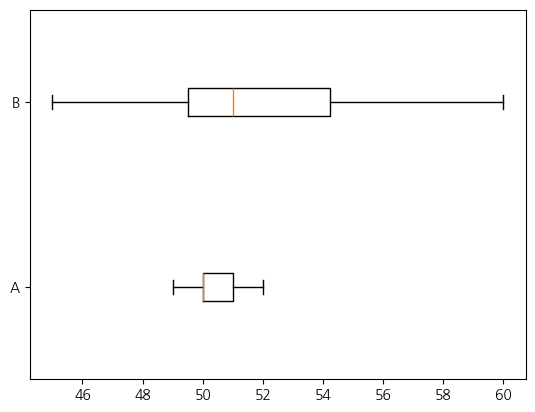

B 공정이 더 변동성이 큼.

A 공정이 더 적합함.


In [108]:
## ===============================================================
##  [ 문제 9] 상자그림(Boxplot) 분석
## ===============================================================
## 다음은 두 공정(A, B)에서 생산된 동일 부품의 길이 데이터이다.
from matplotlib.pyplot import ylabel


A = [50, 50, 51, 50, 49, 50, 51, 52]
B = [50, 55, 45, 50, 60, 48, 54, 52]

## 각 공정의 Q1, Q2(중앙값), Q3를 구하시오.
print(f'A의 1사분위수 => { np.quantile(A, 0.25) }')
print(f'A의 2사분위수 => { np.quantile(A, 0.50) }')
print(f'A의 3사분위수 => { np.quantile(A, 0.75) }')
print(f'B의 1사분위수 => { np.quantile(B, 0.25) }')
print(f'B의 2사분위수 => { np.quantile(B, 0.50) }')
print(f'B의 3사분위수 => { np.quantile(B, 0.75) }\n')

## IQR(사분위수 범위)을 계산하시오.
print(f'A의 IQR => { np.quantile(A, 0.75) - np.quantile(A, 0.25) }')
print(f'B의 IQR => { np.quantile(B, 0.75) - np.quantile(B, 0.25) }\n')

## 사분위수 1.5 IQR 규칙에 따라 각 공정의 이상치를 판정하시오.
A_IQR = np.quantile(A, 0.75) - np.quantile(A, 0.25)
B_IQR = np.quantile(B, 0.75) - np.quantile(B, 0.25)

A_low = np.quantile(A, 0.25) - 1.5 * A_IQR
A_up = np.quantile(A, 0.75) + 1.5 * A_IQR

B_low = np.quantile(B, 0.25) - 1.5 * B_IQR
B_up = np.quantile(B, 0.75) + 1.5 * B_IQR

print(f"A 범위: {A_low} - {A_up}")
print(f"B 범위: {B_low} - {B_up}")
print("A의 이상치: 없음")
print("B의 이상치: 없음")

## 두 공정의 상자그림을 그리고, 변동성 차이를 해석하시오.
plt.boxplot([A, B], vert=False, labels=['A', 'B'])
plt.show()
print("B 공정이 더 변동성이 큼.\n")

## 품질 안정성 측면에서 어떤 공정이 더 적합한지 설명하시오.
print("A 공정이 더 적합함.")

평균: 8063.5
중앙값: 3975.0

분산: 53071612.75
표준편차: 7285.026612854616

중위절대편차: 296.52044370112037



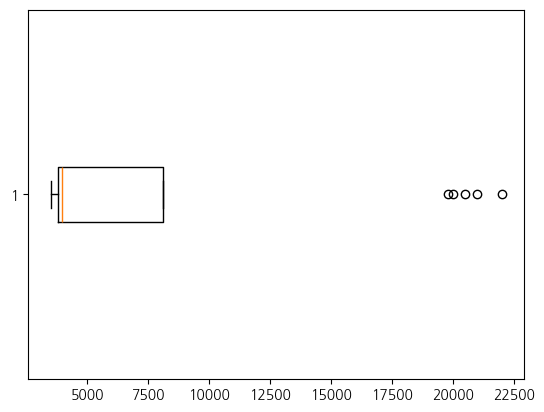

극단치: [19800 20000 20500 21000 22000]

극단치의 영향이 적기 때문.

극단치 영향이 적은 중위절대편차를 사용하는 게 좋음


In [122]:
## ===============================================================
##  [ 문제 10 ] 분산·표준편차 vs MAD vs Boxplot 통합 분석
## ===============================================================
## 다음은 20명의 하루 걸음수 데이터입니다.

from numpy import sort


step = [3500, 4200, 3800, 4000, 4100,
 3950, 4020, 3900, 3800, 3700,
 20000, 21000, 20500, 19800, 22000,
 3600, 3700, 3800, 3900, 4000]


## 평균, 중앙값을 구하시오.
print(f"평균: {np.mean(step)}")
print(f"중앙값: {np.median(step)}\n")

## 분산, 표준편차를 구하시오.
print(f"분산: {np.var(step)}")
print(f"표준편차: {np.std(step)}\n")

## MAD를 구하시오.
print(f"중위절대편차: { robust.mad(step) }\n")

## 상자그림(Boxplot)을 그리고 극단치를 판정하시오.
plt.boxplot(step, vert=False)
plt.show()
print(f"극단치: {sort(step)[-5:]}\n")

## 이 데이터에서 “변동성을 판단할 때 표준편차보다 MAD가 더 적합한 이유”를 설명하시오.
print("극단치의 영향이 적기 때문.\n")

## 만약 건강앱에서 사용자 걸음 트렌드를 분석하려 한다면, 
## 어떤 대표값과 어떤 변동성 지표를 사용하는 것이 좋은지 이유와 함께 제안하시오.
print("극단치 영향이 적은 중위절대편차를 사용하는 게 좋음")